<a href="https://colab.research.google.com/github/Mighty44/testlab/blob/main/TextProcessing_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 5/24: Load packages  ####

# Helper packages.
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pathlib import Path
# Packages with tools for text processing.
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Get common English stop words.
stop_words = stopwords.words('english')




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swaroopnc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/swaroopnc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#=================================================-
#### Slide 6/24: Directory settings  ####

# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




/Users/swaroopnc/Desktop/assets_st2_27_nlp_250317_v2
/Users/swaroopnc/Desktop/assets_st2_27_nlp_250317_v2/data


In [ ]:
#=================================================-
#### Slide 8/24: Download NLTK resources  ####

# Command to download resources from NLTK package.

#nltk.download()

# Uncomment above command to download,
# Once successfully downloaded, comment it back to avoid repetitive download trials




In [ ]:
#=================================================-
#### Slide 11/24: Load text data  ####

df = pd.read_csv(str(data_dir)+"/"+ "NYT_article_data.csv")
print(df.columns)
# Look at the columns.
print(df["snippet"].head())




Index(['web_url', 'headline', 'snippet', 'word_count', 'source',
       'type_of_material', 'date', 'id'],
      dtype='object')
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [ ]:
#=================================================-
#### Slide 12/24: Drop missing data  ####

# Print total number of NAs.
print(df["snippet"].isna().sum())
# Drop NAs if any.
df = df.dropna(subset = ["snippet"]).reset_index(drop=True)
print(df["snippet"].isna().sum())




0
0


In [ ]:
#=================================================-
#### Slide 14/24: Create a series of documents  ####

# Isolate the `snippet` column.
df_text = df["snippet"]
print(type(df_text))
# Look at a sample of the `snippet` column, 0-5.
print(df_text[0:5])


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


<class 'pandas.core.series.Series'>
0    Nick Kyrgios started his Brisbane Open title d...
1    British police confirmed on Tuesday they were ...
2    Marcellus Wiley is still on the fence about le...
3    Still reckoning with the fallout from her Emme...
4    As far as Arike Ogunbowale and coach Muffet Mc...
Name: snippet, dtype: object


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 7/30: Tokenization: split each document into words  ####

# Before we start tokenizing, it is important to check for NAs and drop them
df_text = df_text.dropna().reset_index(drop=True)
# Tokenize each document into a large list of tokenized documents.
df_tokenized = [word_tokenize(df_text[i]) for i in range(0, len(df_text))]




In [ ]:
#=================================================-
#### Slide 8/30: Save the first tokenized document  ####

# Let's take a look at the first tokenized document
document_words = df_tokenized[0]
print(document_words)




['Nick', 'Kyrgios', 'started', 'his', 'Brisbane', 'Open', 'title', 'defense', 'with', 'a', 'battling', '7-6', '(', '5', ')', '5-7', '7-6', '(', '5', ')', 'victory', 'over', 'American', 'Ryan', 'Harrison', 'in', 'the', 'opening', 'round', 'on', 'Tuesday', '.']


In [ ]:
#=================================================-
#### Slide 10/30: Convert characters to lowercase  ####

# 1. Convert to lowercase.
document_words = [word.lower() for word in document_words]
print(document_words[:10])




['nick', 'kyrgios', 'started', 'his', 'brisbane', 'open', 'title', 'defense', 'with', 'a']


In [ ]:
#=================================================-
#### Slide 12/30: Remove stop words  ####

# 2. Remove stop words.
# Get common English stop words.
stop_words = stopwords.words('english')
print(stop_words[:10])
# Remove stop words.
document_words = [word for word in document_words if not word in stop_words]
print(document_words[:10])




['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', '7-6', '(']


In [ ]:
#=================================================-
#### Slide 14/30: Remove non-alphabetical characters  ####

# 3. Remove punctuation and any non-alphabetical characters.
document_words = [word for word in document_words if word.isalpha()]
print(document_words[:10])




['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', 'victory', 'american']


In [ ]:
#=================================================-
#### Slide 18/30: Stem words  ####

# 4. Stem words.
document_words = [PorterStemmer().stem(word) for word in document_words]
print(document_words[:10])




['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']


In [ ]:
#=================================================-
#### Slide 20/30: Implement pre-processing steps on a corpus  ####

# Create a list for clean documents.
df_clean = [None] * len(df_tokenized)
# Create a list of word counts for each clean document.
word_counts_per_document = [None] * len(df_tokenized)
# Process words in all documents.
for i in range(len(df_tokenized)):
    # 1. Convert to lowercase.
    df_clean[i] = [document.lower() for document in df_tokenized[i]]

    # 2. Remove stop words.
    df_clean[i] = [word for word in df_clean[i] if not word in stop_words]

    # 3. Remove punctuation and any non-alphabetical characters.
    df_clean[i] = [word for word in df_clean[i] if word.isalpha()]

    # 4. Stem words.
    df_clean[i] = [PorterStemmer().stem(word) for word in df_clean[i]]

    # Record the word count per document.
    word_counts_per_document[i] = len(df_clean[i])




In [ ]:
#=================================================-
#### Slide 21/30: Inspect results  ####

print(df_clean[0][:10])
print(df_clean[5][:10])
print(df_clean[10][:10])
print(df_clean[15][:10])
print(df_clean[20][:10])




['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']
['prohibit', 'vacat', 'rental', 'arrang', 'onlin', 'airbnb', 'move', 'closer', 'realiti', 'thursday']
['labor', 'movement', 'press', 'govern', 'get', 'feder', 'employe', 'back', 'work', 'highlight']
['william', 'seed', 'may', 'match', 'simona', 'halep', 'perhap', 'sister', 'venu', 'melbourn']
['epiphani', 'celebr', 'bring', 'togeth', 'hundr', 'peopl', 'romanian', 'villag', 'pietrosani', 'day']


[15, 22, 27, 17, 19, 12, 5, 11, 23, 13]


Text(0, 0.5, 'Frequency')

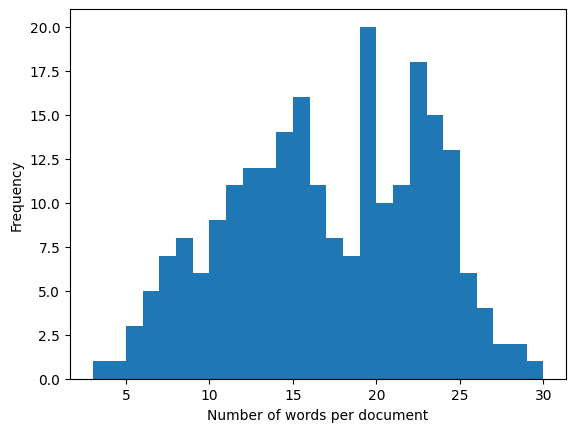

In [ ]:
#=================================================-
#### Slide 22/30: Remove empty and very short documents  ####

# Let's take a look at total word counts per document (for the first 10).
print(word_counts_per_document[:10])
# Plot a histogram for word counts per document, set bins to number of unique values in the list.
plt.hist(word_counts_per_document, bins = len(set(word_counts_per_document)))
plt.xlabel('Number of words per document')
plt.ylabel('Frequency')




In [ ]:
#=================================================-
#### Slide 23/30: Remove empty and very short documents (cont'd)  ####

# Convert word counts list and documents list to NumPy arrays.
word_counts_array = np.array(word_counts_per_document)
df_array = np.array(df_clean,dtype= object)
print(len(df_array))
# Find indices of all documents where there are greater than or equal to 5 words.
valid_documents = np.where(word_counts_array >= 5)[0]
print(len(valid_documents))




233
231


In [ ]:
#=================================================-
#### Slide 24/30: Remove empty and very short documents (cont'd)  ####

# Subset the df_array to keep only those where there are at least 5 words.
df_array = df_array[valid_documents]
print(len(df_array))
df_clean = df_array.tolist() # Convert the array back to a list.
print(df_clean[:5])




231
[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi'], ['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de'], ['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi', 'chang', 'even', 'move', 'forward', 'new', 'galleri', 'show'], ['far', 'arik', 'ogunbowal', 'coach', 'muffet', 'mcgraw', 'concern', 'notr', 'dame', 'victori', 'louisvil', 'thursday', 'night', 'anoth', 'atlant', 'coast', 'confer', 'game', 'januari']]


In [ ]:
#=================================================-
#### Slide 25/30: .join() function  ####

# Here is a simple example of the `.join()` function in action!
numList = ['1', '2', '3', '4']
print(', '.join(numList))




1, 2, 3, 4


In [ ]:
#=================================================-
#### Slide 26/30: Save processed text to file using .join()  ####

# Join words in each document into a single character string.
df_clean_list = [' '.join(document) for document in df_clean]
print(df_clean_list[:2])
# Save output file name to a variable.
out_filename = str(data_dir) + "/clean_df.txt"
# Create a function that takes a list of character strings
# and a name of an output file and writes it into a txt file.
def write_lines(lines, filename):    #<- given lines to write and filename
    joined_lines = '\n'.join(lines)  #<- join lines with line breaks
    file = open( out_filename, 'w')  #<- open write only file
    file.write(joined_lines)         #<- write lines to file
    file.close()                     #<- close connection

# Write sequences to file.
write_lines(df_clean_list, out_filename)


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


['nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday', 'british polic confirm tuesday treat stab attack injur three peopl manchest victoria train station terrorist investig search address cheetham hill area citi']


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Intro To N L P: Text Processing - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 6/22: Create a DTM  ####

# Initialize `CountVectorizer`.
vec = CountVectorizer()
# Transform the list of documents clean documents `df_clean_list` into DTM.
X = vec.fit_transform(df_clean_list)
print(X.toarray()) #<- to show output as a matrix
print(vec.get_feature_names_out()[:10])




[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['abduct' 'abl' 'abo' 'absente' 'abus' 'academ' 'accept' 'access'
 'accessori' 'accommod']


In [ ]:
#=================================================-
#### Slide 7/22: Create a DTM (cont'd)  ####

# Convert the matrix into a Pandas DataFrame for easier manipulation.
DTM = pd.DataFrame(X.toarray(), columns = vec.get_feature_names_out())
print(DTM.head())




   abduct  abl  abo  absente  abus  academ  accept  access  accessori  \
0       0    0    0        0     0       0       0       0          0   
1       0    0    0        0     0       0       0       0          0   
2       0    0    0        0     0       0       0       0          0   
3       0    0    0        0     0       0       0       0          0   
4       0    0    0        0     0       0       0       0          0   

   accommod  ...  writer  xinhua  year  yell  yet  york  young  yuan  zimbabw  \
0         0  ...       0       0     0     0    0     0      0     0        0   
1         0  ...       0       0     0     0    0     0      0     0        0   
2         0  ...       0       0     0     0    0     0      1     0        0   
3         0  ...       0       0     0     0    0     0      0     0        0   
4         0  ...       0       0     0     0    0     0      0     0        0   

   zykera  
0       0  
1       0  
2       0  
3       0  
4       0  

[

In [ ]:
#=================================================-
#### Slide 8/22: DTM to dictionary of total word counts  ####

# Create a convenience function that sorts and looks at first n-entries in the dictionary.
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order
    sorted_x = sorted(dict_x.items(),
                      reverse = True,
                      key = lambda kv: kv[1])

    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)

    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))




In [ ]:
#=================================================-
#### Slide 9/22: DTM to dictionary of total word counts (cont'd)  ####

# Sum frequencies of each word in all documents.
DTM.sum(axis = 0).head()
# Save series as a dictionary.
corpus_freq_dist = DTM.sum(axis = 0).to_dict()
# Glance at the frequencies.
print(HeadDict(corpus_freq_dist, 6))




{'said': 38, 'new': 36, 'presid': 28, 'year': 27, 'friday': 22, 'govern': 22}


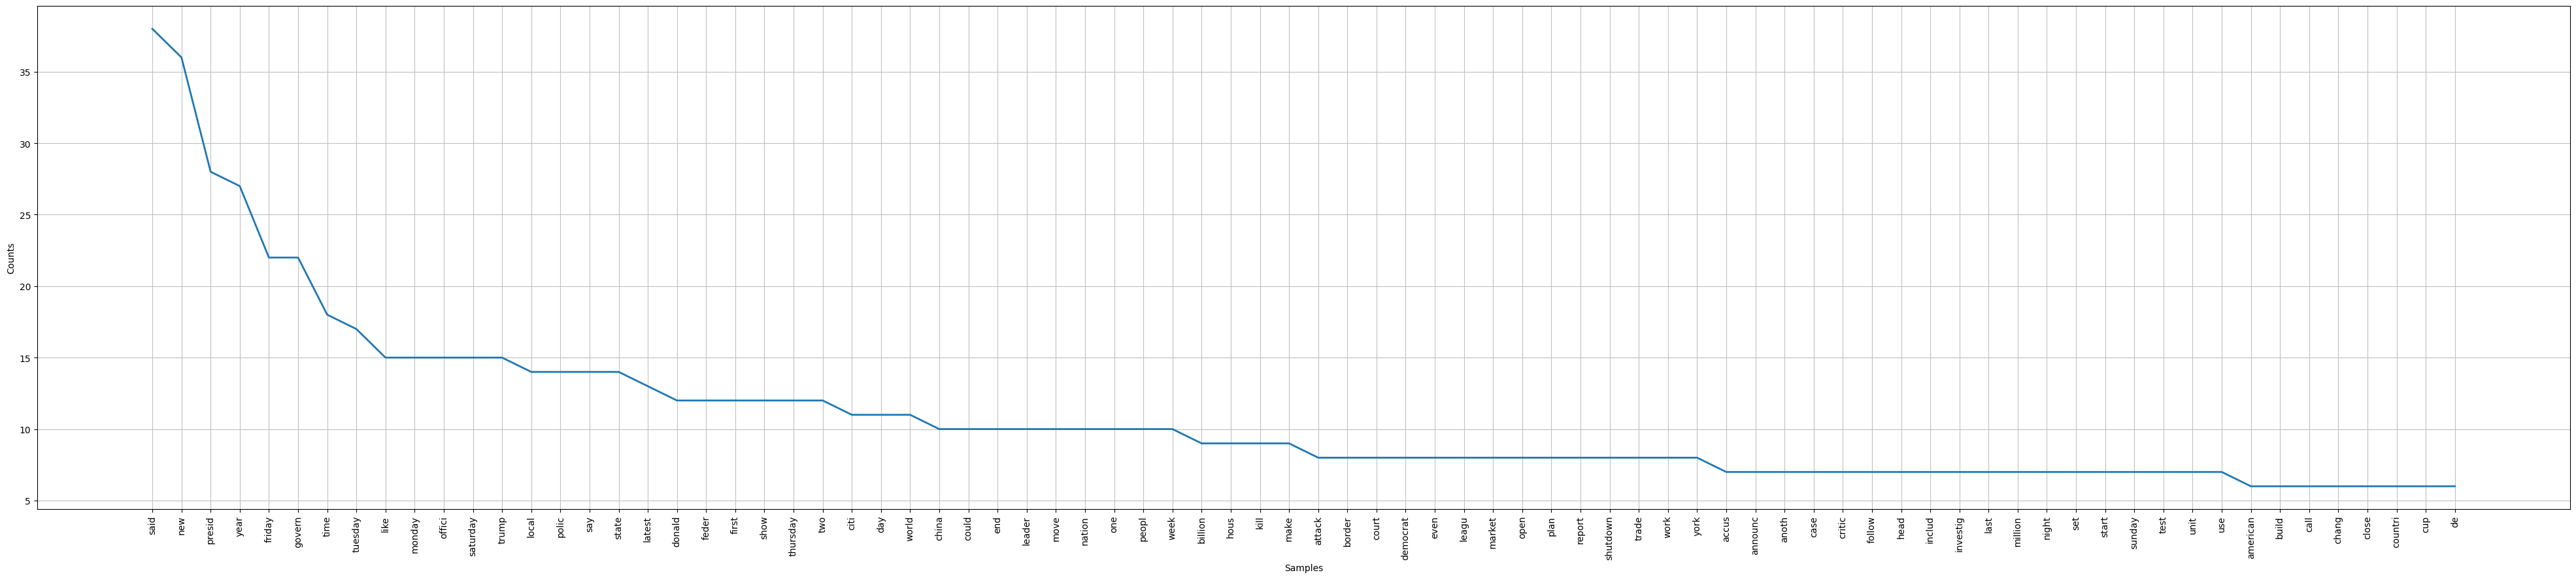

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#=================================================-
#### Slide 12/22: Plot distribution of words in document corpus  ####

# Save as a FreqDist object native to nltk.
corpus_freq_dist = nltk.FreqDist(corpus_freq_dist)
# Plot distribution for the entire corpus.
plt.figure(figsize = (50, 10))
corpus_freq_dist.plot(80)




In [ ]:
#=================================================-
#### Slide 15/22: Visualizing words using n-grams  ####

from nltk.util import ngrams

print(df_clean_list[0])
word = df_clean_list[0].split()
print(list(ngrams(word, 2)))  #<- set value of n as 2
print(list(ngrams(word, 3)))  #<- set value of n as 3




nick kyrgio start brisban open titl defens battl victori american ryan harrison open round tuesday
[('nick', 'kyrgio'), ('kyrgio', 'start'), ('start', 'brisban'), ('brisban', 'open'), ('open', 'titl'), ('titl', 'defens'), ('defens', 'battl'), ('battl', 'victori'), ('victori', 'american'), ('american', 'ryan'), ('ryan', 'harrison'), ('harrison', 'open'), ('open', 'round'), ('round', 'tuesday')]
[('nick', 'kyrgio', 'start'), ('kyrgio', 'start', 'brisban'), ('start', 'brisban', 'open'), ('brisban', 'open', 'titl'), ('open', 'titl', 'defens'), ('titl', 'defens', 'battl'), ('defens', 'battl', 'victori'), ('battl', 'victori', 'american'), ('victori', 'american', 'ryan'), ('american', 'ryan', 'harrison'), ('ryan', 'harrison', 'open'), ('harrison', 'open', 'round'), ('open', 'round', 'tuesday')]


In [ ]:
#=================================================-
#### Slide 16/22: Convenience function to generate n-grams  ####

def generate_ngrams(df_clean_list):
  for i in range(len(df_clean_list)):
      for n in range(2, 4):
          n_grams = ngrams(df_clean_list[i].split(), n)
          for grams in n_grams:
              print(grams)
generate_ngrams(df_clean_list[0:10])




('nick', 'kyrgio')
('kyrgio', 'start')
('start', 'brisban')
('brisban', 'open')
('open', 'titl')
('titl', 'defens')
('defens', 'battl')
('battl', 'victori')
('victori', 'american')
('american', 'ryan')
('ryan', 'harrison')
('harrison', 'open')
('open', 'round')
('round', 'tuesday')
('nick', 'kyrgio', 'start')
('kyrgio', 'start', 'brisban')
('start', 'brisban', 'open')
('brisban', 'open', 'titl')
('open', 'titl', 'defens')
('titl', 'defens', 'battl')
('defens', 'battl', 'victori')
('battl', 'victori', 'american')
('victori', 'american', 'ryan')
('american', 'ryan', 'harrison')
('ryan', 'harrison', 'open')
('harrison', 'open', 'round')
('open', 'round', 'tuesday')
('british', 'polic')
('polic', 'confirm')
('confirm', 'tuesday')
('tuesday', 'treat')
('treat', 'stab')
('stab', 'attack')
('attack', 'injur')
('injur', 'three')
('three', 'peopl')
('peopl', 'manchest')
('manchest', 'victoria')
('victoria', 'train')
('train', 'station')
('station', 'terrorist')
('terrorist', 'investig')
('inves

(-0.5, 399.5, 199.5, -0.5)

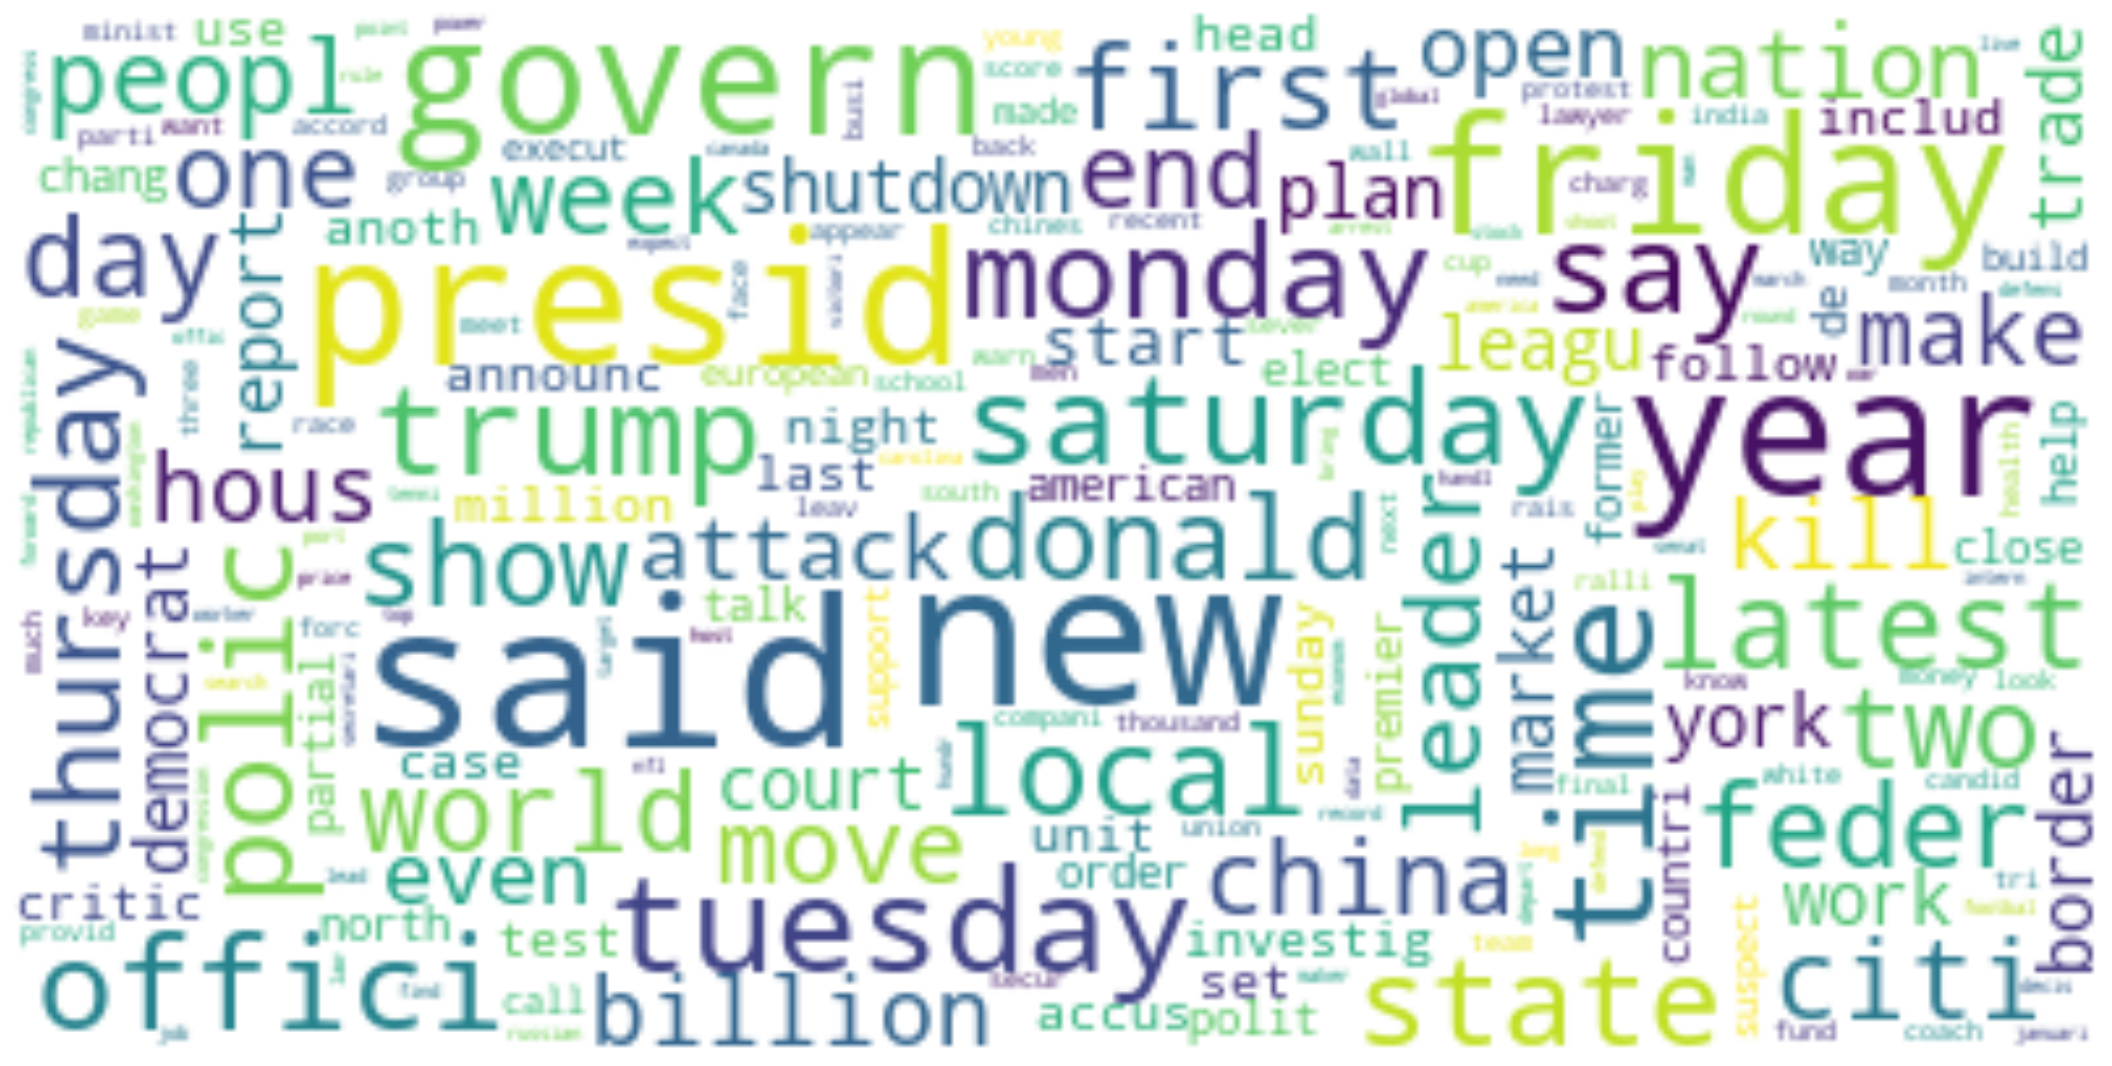

In [ ]:
#=================================================-
#### Slide 17/22: Visualizing word counts with word clouds  ####

# Construct a word cloud from corpus.
wordcloud = WordCloud(max_font_size = 40, background_color = "white", collocations = False)
wordcloud = wordcloud.generate(' '.join(df_clean_list))
plt.figure(figsize = (27, 20)) # Plot the cloud using matplotlib.
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")




In [ ]:
#=================================================-
#### Slide 19/22: Exercise  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
